# Imports

In [1]:
#!/usr/bin/env python
# coding: utf-8
import os
import sys
import json
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import pyplot as plt

# Load data

In [2]:
df = pd.read_csv("./Temp/data1.csv")
print(df.shape)
display(df.head(2))
display(df.tail(2))

(615891, 7)


,Unnamed: 0,Time,Open,High,Low,Close,Volume
0,0,2022-08-02 22:02:00,1761.724,1761.784,1761.208,1761.264,1
1,1,2022-08-02 22:03:00,1761.244,1761.754,1761.148,1761.438,1


,Unnamed: 0,Time,Open,High,Low,Close,Volume
615889,199998,2024-04-24 14:58:00,2329.174,2330.248,2328.725,2329.138,1
615890,199999,2024-04-24 14:59:00,2329.138,2329.595,2328.715,2329.578,1


## Preprocess 

In [3]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df['Average'] = (df['Open'] + df['Close']) / 2

# show data 

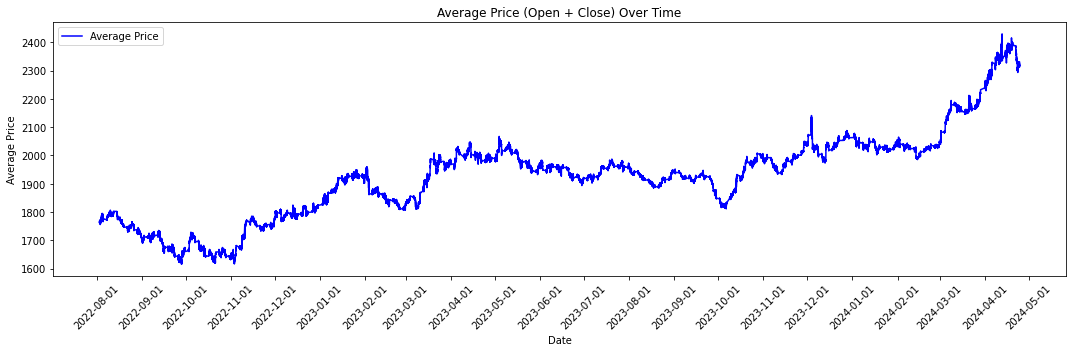

In [4]:
monthly_data = df.resample('MS').first()  # 'MS' means start of month

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Average'], label='Average Price', color='blue')

# Customize x-axis tick labels to show only the start of each month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Average Price (Open + Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.tight_layout()
plt.show()


# Resistance and Support 

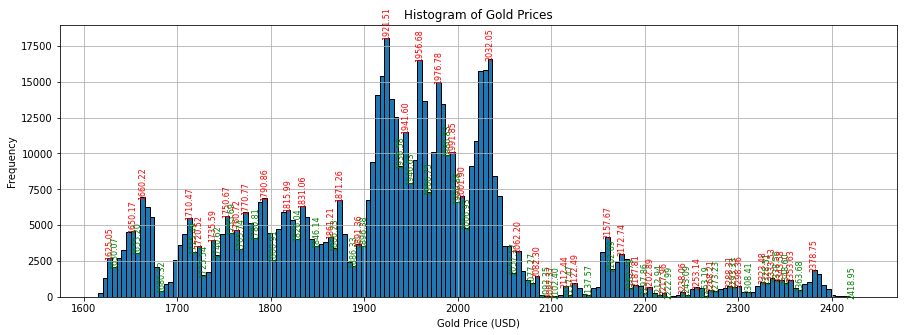

In [21]:
plt.figure(figsize=(15, 5))

# Calculate the average price of gold (Open + Close) / 2
price_of_gold = (df['Open'] + df['Close']) / 2

# Define bin width and range based on the data
bin_width = 5
min_value = int(price_of_gold.min())  # Minimum value in the series
max_value = int(price_of_gold.max())  # Maximum value in the series
num_bins = int((max_value - min_value) / bin_width)

# Create a histogram
n, bins, patches = plt.hist(price_of_gold, bins=num_bins, range=(min_value, max_value), edgecolor='k')

# Customize the plot (add labels, title, etc.)
plt.xlabel('Gold Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Gold Prices')
plt.grid(True)

# Identify potential support and resistance levels
for i in range(1, len(n) - 1):
    if n[i] > n[i - 1] and n[i] > n[i + 1]:
        plt.text(bins[i] + bin_width / 2, n[i] + 5, f'{bins[i]:.2f}', ha='center', fontsize=8, color='red', rotation='vertical')
    elif n[i] < n[i - 1] and n[i] < n[i + 1]:
        plt.text(bins[i] + bin_width / 2, n[i] + 5, f'{bins[i]:.2f}', ha='center', fontsize=8, color='green', rotation='vertical')

# Show the histogram
plt.show()


# Candel size analize

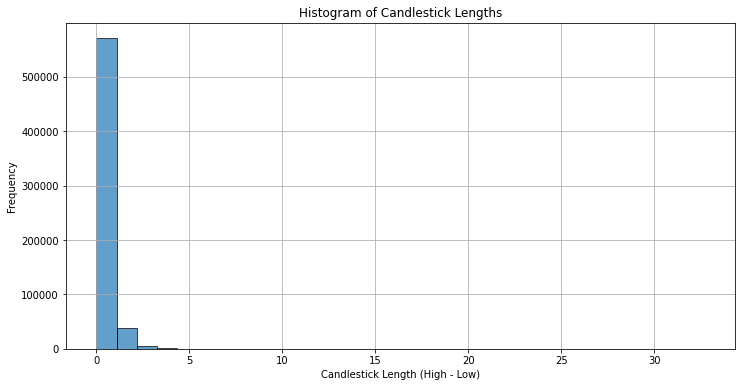

Maximum Candlestick Length: 32.72
Minimum Candlestick Length: 0.00
Median Candlestick Length: 0.39
Average Candlestick Length: 0.50


In [22]:
df['CandleLength'] = df['High'] - df['Low']

# Plot histogram of candlestick lengths
plt.figure(figsize=(12, 6))
plt.hist(df['CandleLength'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Candlestick Length (High - Low)')
plt.ylabel('Frequency')
plt.title('Histogram of Candlestick Lengths')
plt.grid(True)
plt.show()

# Compute summary statistics
max_candle = df['CandleLength'].max()
min_candle = df['CandleLength'].min()
median_candle = df['CandleLength'].median()
average_candle = df['CandleLength'].mean()

# Output summary statistics
print(f"Maximum Candlestick Length: {max_candle:.2f}")
print(f"Minimum Candlestick Length: {min_candle:.2f}")
print(f"Median Candlestick Length: {median_candle:.2f}")
print(f"Average Candlestick Length: {average_candle:.2f}")


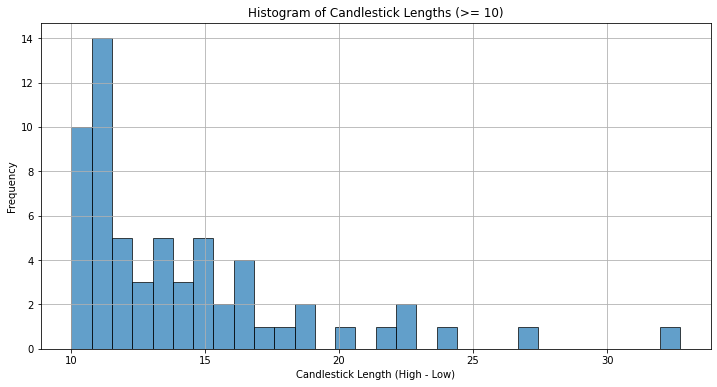

Maximum Candlestick Length (>= 10): 32.72
Minimum Candlestick Length (>= 10): 10.02
Median Candlestick Length (>= 10): 12.76
Average Candlestick Length (>= 10): 14.18


In [24]:
threshold = 10
df['CandleLength'] = df['High'] - df['Low']
filtered_df = df[df['CandleLength'] >= threshold]

# Plot histogram of candlestick lengths for filtered data
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['CandleLength'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Candlestick Length (High - Low)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Candlestick Lengths (>= {threshold})')
plt.grid(True)
plt.show()

# Compute summary statistics for filtered data
max_candle = filtered_df['CandleLength'].max()
min_candle = filtered_df['CandleLength'].min()
median_candle = filtered_df['CandleLength'].median()
average_candle = filtered_df['CandleLength'].mean()

# Output summary statistics
print(f"Maximum Candlestick Length (>= {threshold}): {max_candle:.2f}")
print(f"Minimum Candlestick Length (>= {threshold}): {min_candle:.2f}")
print(f"Median Candlestick Length (>= {threshold}): {median_candle:.2f}")
print(f"Average Candlestick Length (>= {threshold}): {average_candle:.2f}")
